# CDS6314 Data Mining Assignment – Group TT2L_G2

# Association Rule Mining on Marital Satisfaction Dataset

### Members: [Melvin Siaw Jian Cheng,Chong Jien Sheng,Tong Jian Hao,Ng Siew Yang]

### Imports & Load Data

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv('Marital-satisfaction_Data (1).csv')
df.columns = df.columns.str.strip()  # remove trailing spaces

## Data Exploration (Genral)

In [199]:
# Load the CSV file
df = pd.read_csv("Marital-satisfaction_Data (1).csv")

# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

In [200]:
# Display all column names
print("🧾 Columns:\n", df.columns.tolist())

🧾 Columns:
 ['Country', 'Gender', 'Age', 'Marriage_years', 'children', 'brought_up_children', 'Education', 'Material_status', 'Religion', 'Religiosity', 'Pension', 'Love1', 'happy', 'Esteem1', 'Love2', 'Love3', 'Esteem2', 'self_R', 'Love4', 'Love5', 'KMSS1', 'KMSS2', 'KMSS3', 'Scale1', 'Scale2', 'Scale3', 'Scale4', 'Scale5', 'Scale6', 'Scale7', 'Scale8']


In [201]:
# Show basic information about the dataset
print("\n📦 Dataset Info:")
df.info()


📦 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              7178 non-null   object 
 1   Gender               7178 non-null   int64  
 2   Age                  7178 non-null   float64
 3   Marriage_years       7178 non-null   float64
 4   children             7178 non-null   int64  
 5   brought_up_children  7178 non-null   int64  
 6   Education            7178 non-null   int64  
 7   Material_status      7178 non-null   int64  
 8   Religion             7092 non-null   float64
 9   Religiosity          7178 non-null   int64  
 10  Pension              7178 non-null   int64  
 11  Love1                7178 non-null   int64  
 12  happy                7178 non-null   int64  
 13  Esteem1              7178 non-null   int64  
 14  Love2                7178 non-null   int64  
 15  Love3                

In [202]:
# Display summary statistics for numeric columns
print("\n📈 Descriptive Statistics:")
print(df.describe())


📈 Descriptive Statistics:
            Gender          Age  Marriage_years     children  \
count  7178.000000  7178.000000     7178.000000  7178.000000   
mean      1.533157    40.665018       14.760102     1.766648   
std       0.498934    11.446824       11.587541     1.307748   
min       1.000000    17.000000        0.080000     0.000000   
25%       1.000000    32.000000        5.000000     1.000000   
50%       2.000000    39.000000       12.000000     2.000000   
75%       2.000000    49.000000       23.000000     2.000000   
max       2.000000    88.000000       70.000000    12.000000   

       brought_up_children    Education  Material_status     Religion  \
count          7178.000000  7178.000000      7178.000000  7092.000000   
mean              1.466982     4.242965         2.616188     4.009588   
std               1.383066     0.949635         0.838797     3.020014   
min               0.000000     1.000000         0.000000     1.000000   
25%               0.000000     

In [203]:
# Show value counts for the first few columns (you can expand this)
for col in df.columns[:5]:
    print(f"\n🔢 Value Counts for {col}:")
    print(df[col].value_counts())


🔢 Value Counts for Country:
Country
Croatia         611
Iran            605
Nigeria         594
Brazil          481
Poland          444
Turkey          392
Italy           316
India           299
Portugal        281
Hungary         236
Slovakia        234
Russia          224
Spain           200
Saudi Arabia    199
Switzerland     172
Mexico          168
Estonia         150
Pakistan        131
Kazakhstan      120
China           119
Ghana           103
Bulgaria        102
Germany         101
South Korea     100
U.K.            100
Uganda           99
Malaysia         99
HongKong         99
Greece           95
Kenia            94
Indonesia        88
Canada           69
Romania          53
Name: count, dtype: int64

🔢 Value Counts for Gender:
Gender
2    3827
1    3351
Name: count, dtype: int64

🔢 Value Counts for Age:
Age
30.0    320
32.0    287
35.0    287
40.0    264
34.0    233
       ... 
85.0      1
81.0      1
84.0      1
17.0      1
38.5      1
Name: count, Length: 73, dtype: int

### Histograms of Numeric Columns

C:\Users\melvi\AppData\Local\Temp\ipykernel_15448\766684822.py:4: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\melvi\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


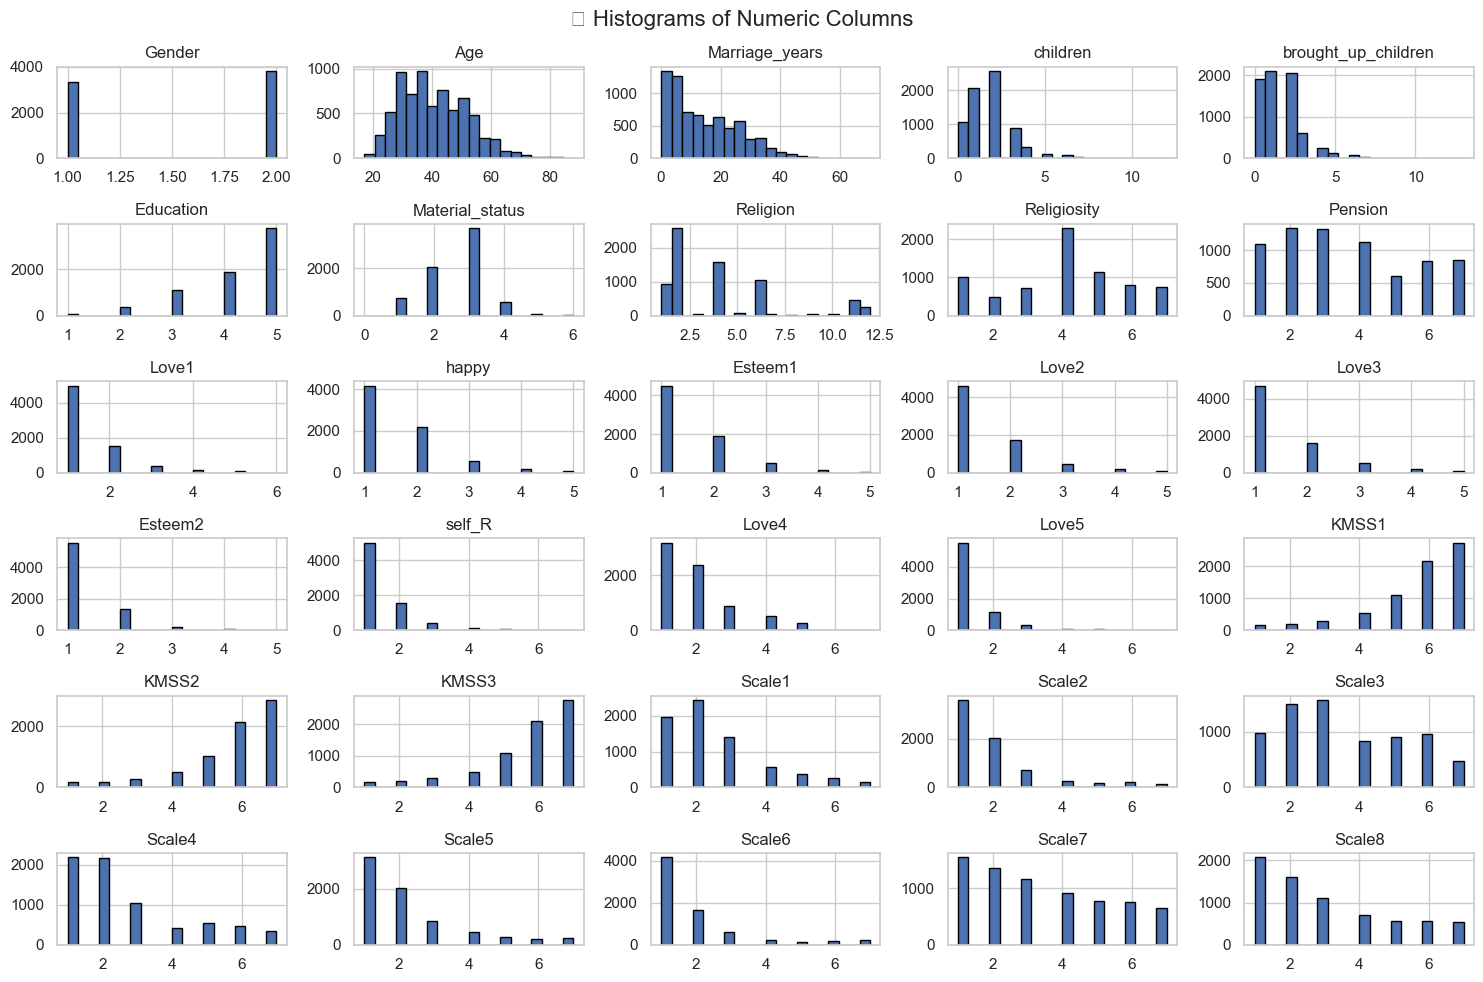

In [204]:
# Plot histograms for all numeric columns
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("📊 Histograms of Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\melvi\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


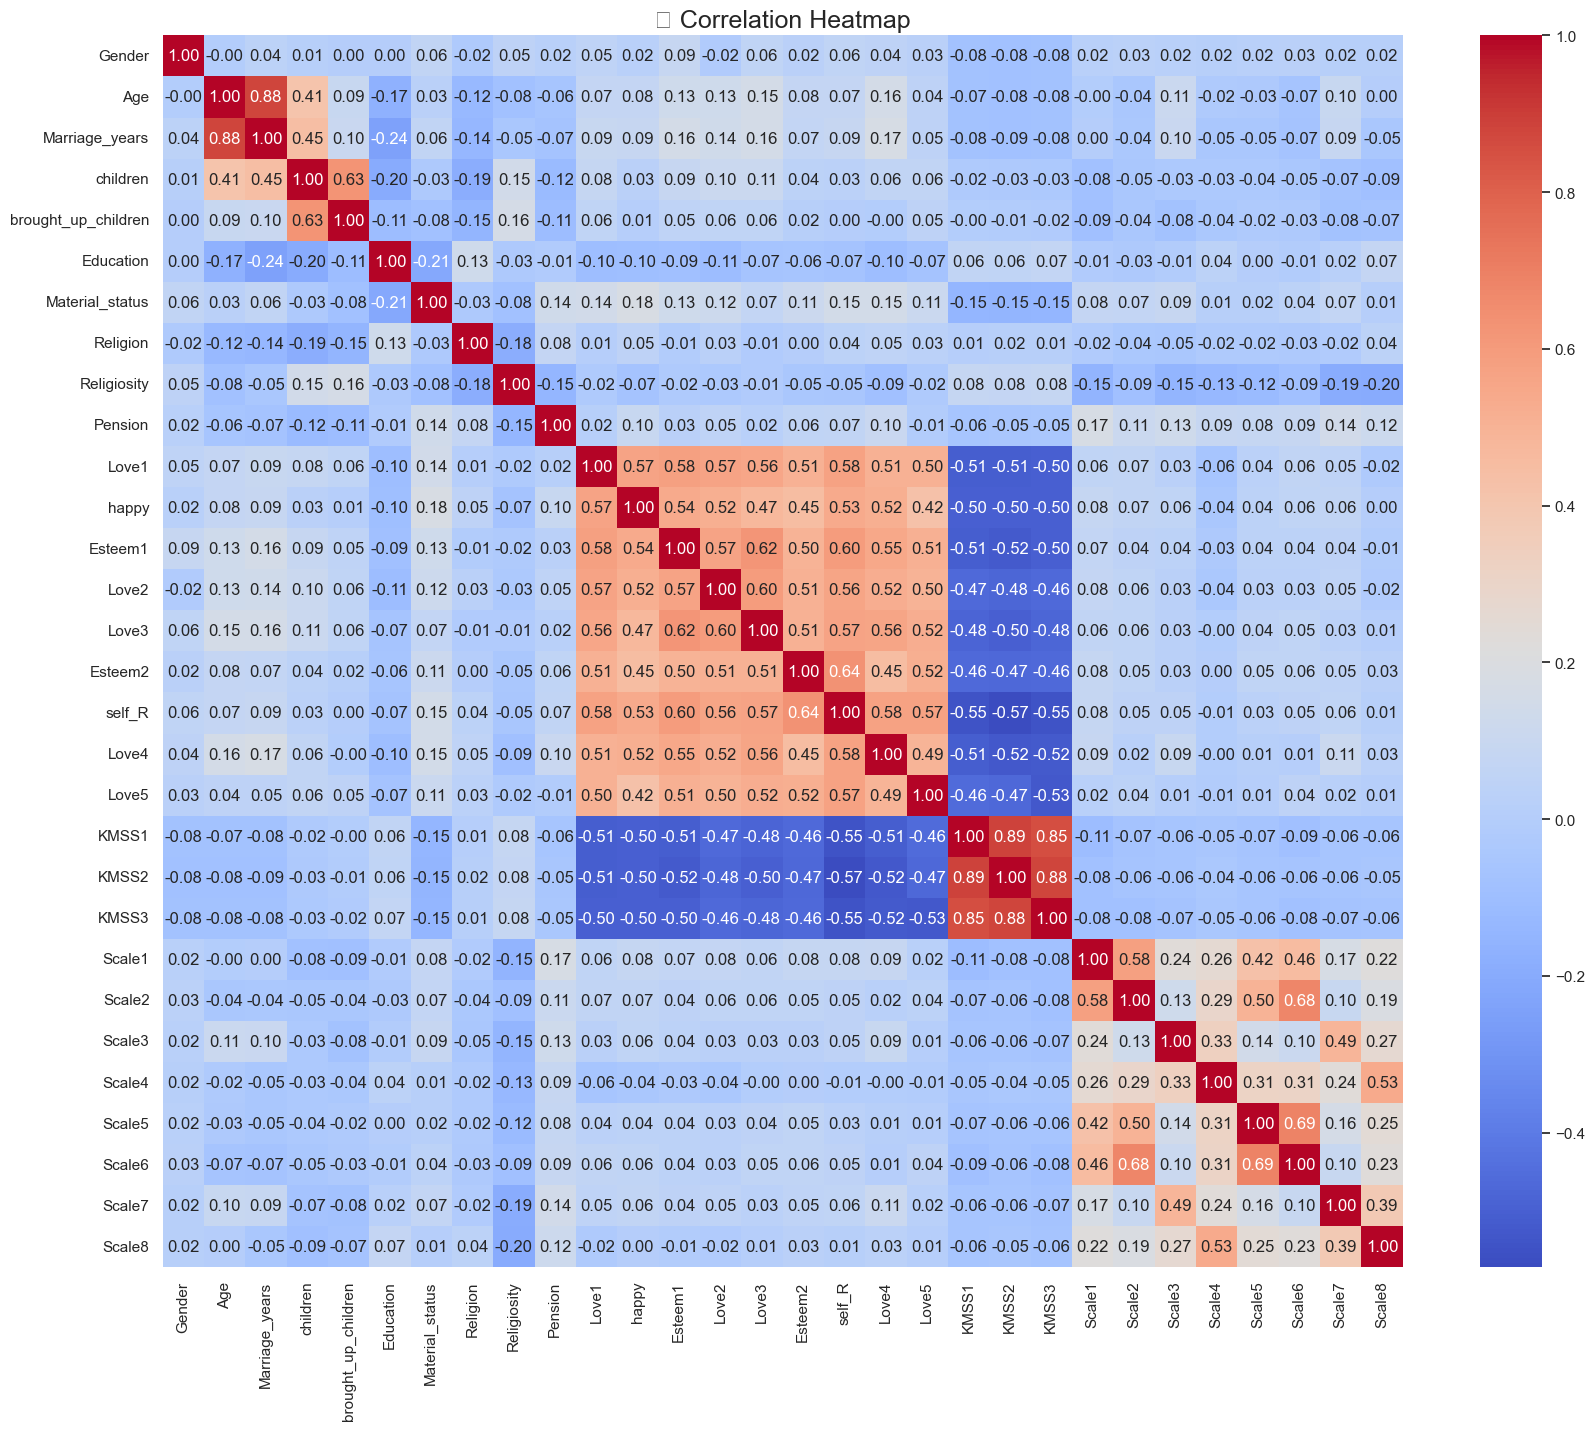

In [205]:
# Plot correlation heatmap for numeric columns
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("🔥 Correlation Heatmap", fontsize=18)
plt.show()


In [206]:
df = df.dropna()

In [207]:
# total number of NaN cells
print(df.isna().sum().sum())  


0


 ## Q1: Do individuals with strong personal collectivist beliefs but low societal collectivism perception experience greater romantic involvement in marriage?

In [208]:
import pandas as pd

try:
    df = pd.read_csv('Marital-satisfaction_Data (1).csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Marital-satisfaction_Data.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")

,Country,Gender,Age,Marriage_years,children,brought_up_children,Education,Material_status,Religion,Religiosity,...,KMSS2,KMSS3,Scale1,Scale2,Scale3,Scale4,Scale5,Scale6,Scale7,Scale8
0,Brazil,1,21.0,2.0,0,0,5,0,1.0,4,...,7,7,1,1,1,1,1,1,1,1
1,Brazil,1,29.0,3.0,1,0,5,3,1.0,6,...,6,6,2,1,1,1,1,1,1,1
2,Brazil,1,30.0,7.0,0,0,5,3,1.0,4,...,7,7,2,1,2,1,1,1,1,1
3,Brazil,1,30.0,7.0,1,1,5,3,1.0,6,...,6,6,3,1,1,2,1,1,1,1
4,Brazil,1,28.0,9.0,0,0,4,2,1.0,5,...,6,7,3,2,3,2,1,1,1,1


(7178, 31)


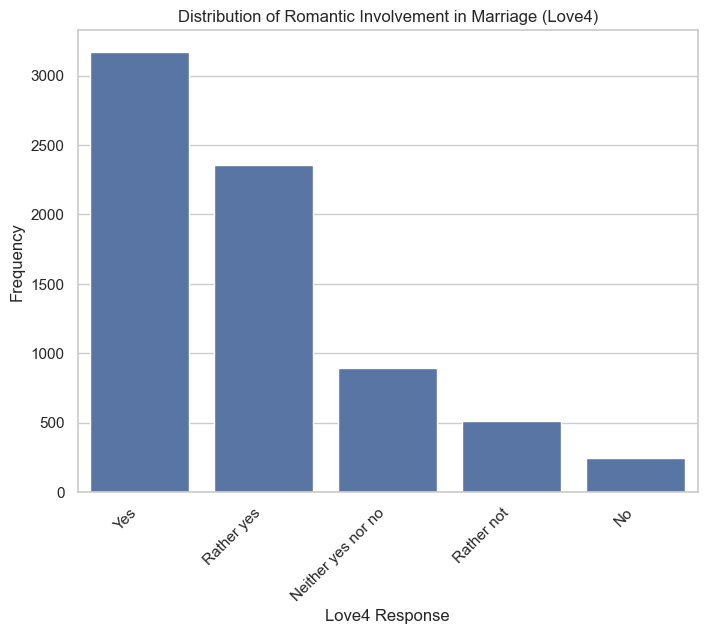

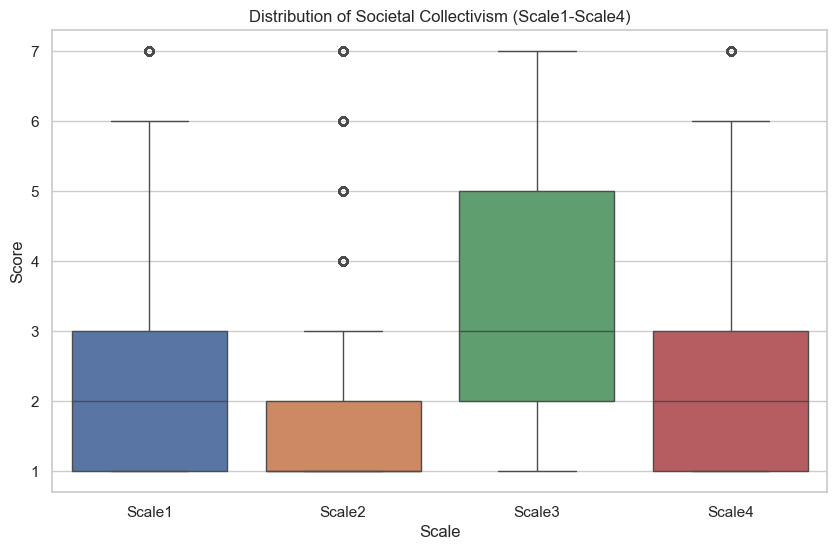

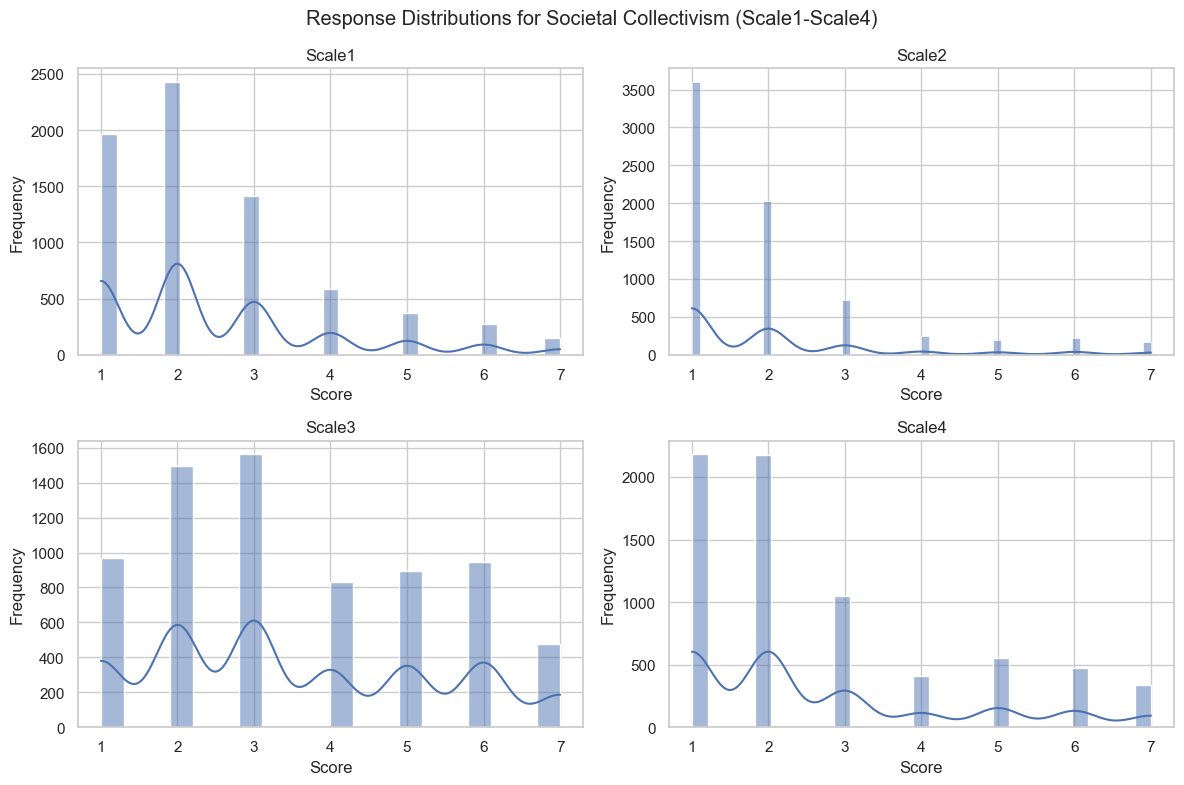

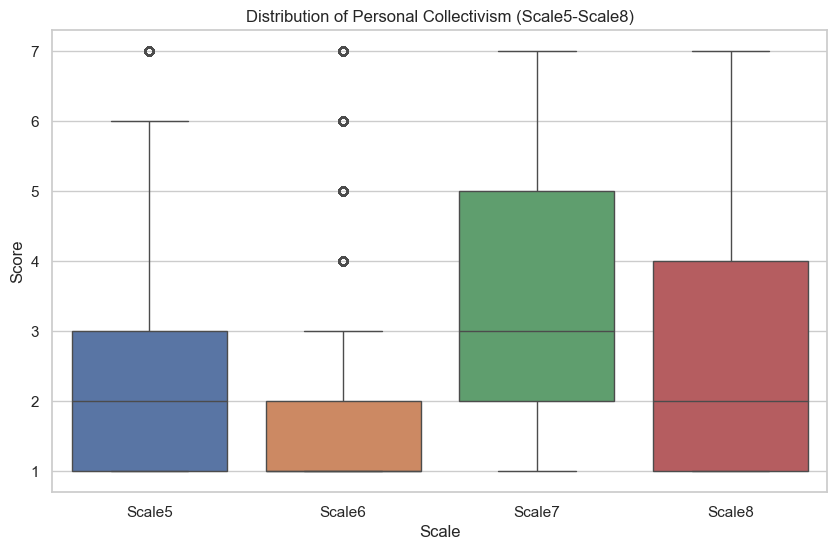

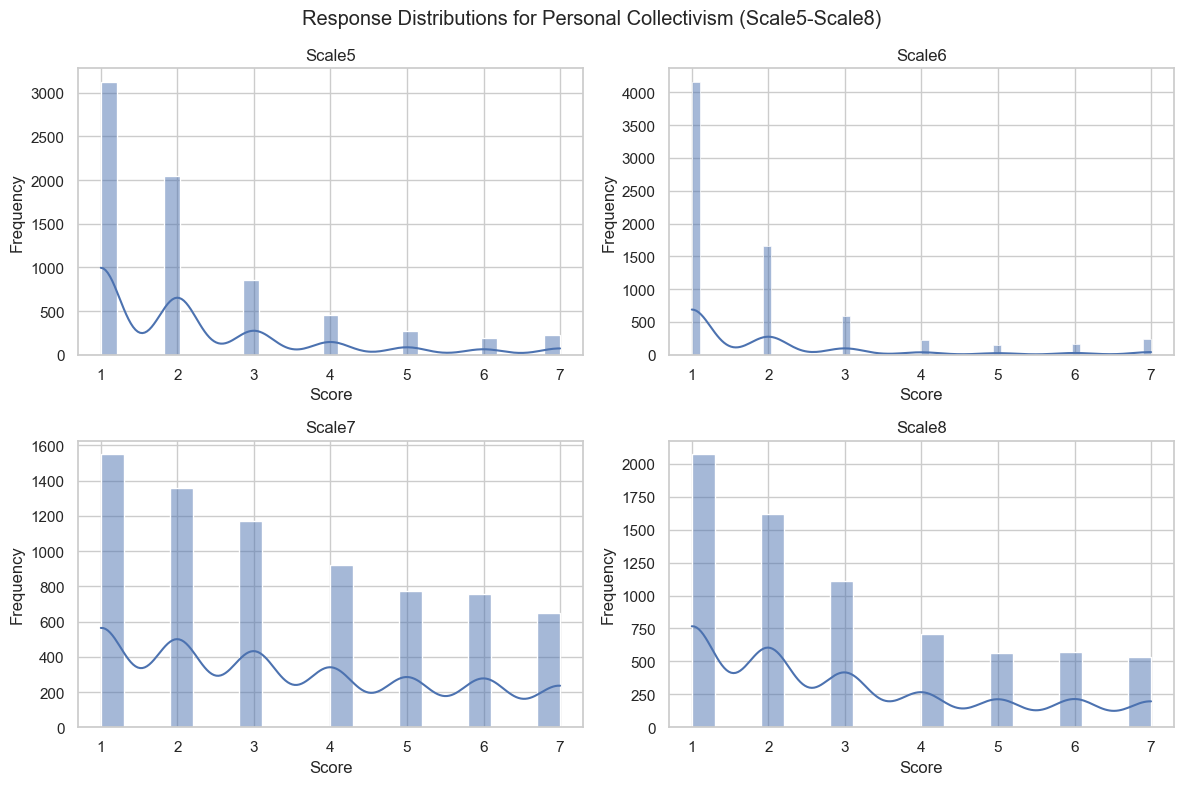

In [209]:
# Define the mapping of values to labels
love4_mapping = {
    1: 'Yes',
    2: 'Rather yes',
    3: 'Neither yes nor no',
    4: 'Rather not',
    5: 'No'
}

# Replace the numerical values in 'Love4' with the corresponding labels
df['Love4_Labels'] = df['Love4'].map(love4_mapping)

# --- Visualization 1: Distribution of Love4 with Custom Labels ---
plt.figure(figsize=(8, 6))
sns.countplot(x='Love4_Labels', data=df, order=love4_mapping.values())  # Use countplot for categorical data
plt.title('Distribution of Romantic Involvement in Marriage (Love4)')
plt.xlabel('Love4 Response')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ... (previous code for Love4 visualization) ...

# --- Visualization 2: Distribution of Societal Collectivism (Scale1-Scale4) ---
# Original box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Scale1', 'Scale2', 'Scale3', 'Scale4']])
plt.title('Distribution of Societal Collectivism (Scale1-Scale4)')
plt.xlabel('Scale')
plt.ylabel('Score')
plt.show()

# Response distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Response Distributions for Societal Collectivism (Scale1-Scale4)')
for i, scale_name in enumerate(['Scale1', 'Scale2', 'Scale3', 'Scale4']):
    row = i // 2
    col = i % 2
    sns.histplot(df[scale_name], kde=True, ax=axes[row, col])
    axes[row, col].set_title(scale_name)
    axes[row, col].set_xlabel('Score')
    axes[row, col].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# --- Visualization 3: Distribution of Personal Collectivism (Scale5-Scale8) ---
# Original box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Scale5', 'Scale6', 'Scale7', 'Scale8']])
plt.title('Distribution of Personal Collectivism (Scale5-Scale8)')
plt.xlabel('Scale')
plt.ylabel('Score')
plt.show()

# Response distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Response Distributions for Personal Collectivism (Scale5-Scale8)')
for i, scale_name in enumerate(['Scale5', 'Scale6', 'Scale7', 'Scale8']):
    row = i // 2
    col = i % 2
    sns.histplot(df[scale_name], kde=True, ax=axes[row, col])
    axes[row, col].set_title(scale_name)
    axes[row, col].set_xlabel('Score')
    axes[row, col].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

#### visual analysis reveals a potential link: respondents with strong personal collectivist beliefs but low societal collectivism perception tend to report more romantic involvement. This supports the hypothesis that personal cultural values may influence emotional closeness in marriage, even when societal norms differ.

In [210]:
pd.crosstab(
    df["Romantic_Involvement"],
    df["Indiv_Strong_Personal_Low_Society"],
    rownames=["Romantic Involvement"],
    colnames=["Strong Personal + Low Societal"]
)

KeyError: 'Romantic_Involvement'

Investigate the relationship between personal collectivist beliefs (Scale5-Scale8), societal collectivism perception (Scale1-Scale4), and romantic involvement (Love4) using box plots.

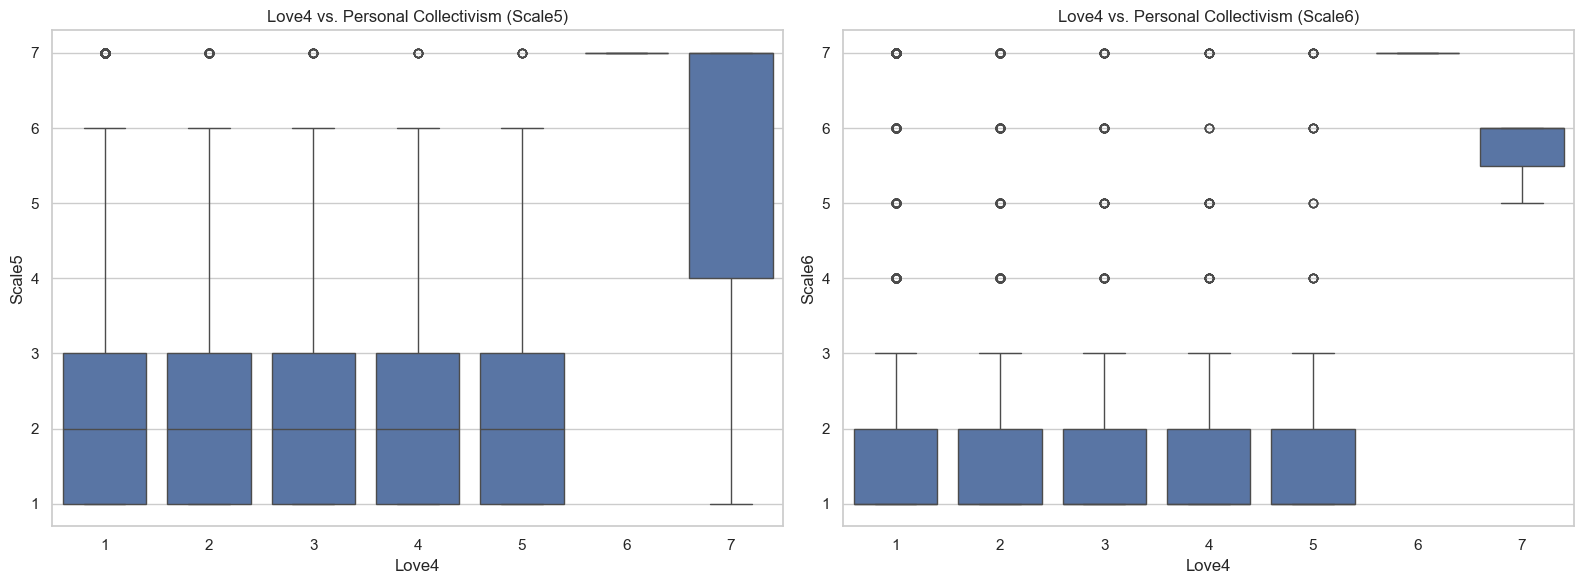

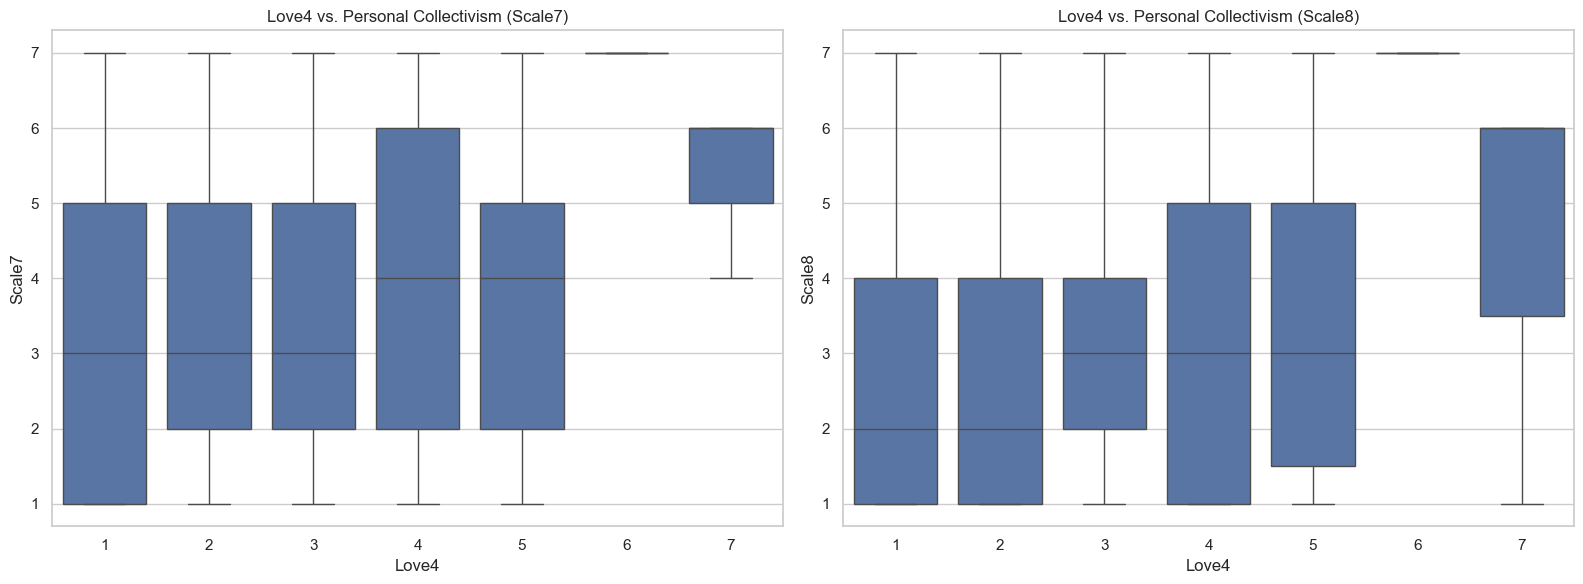

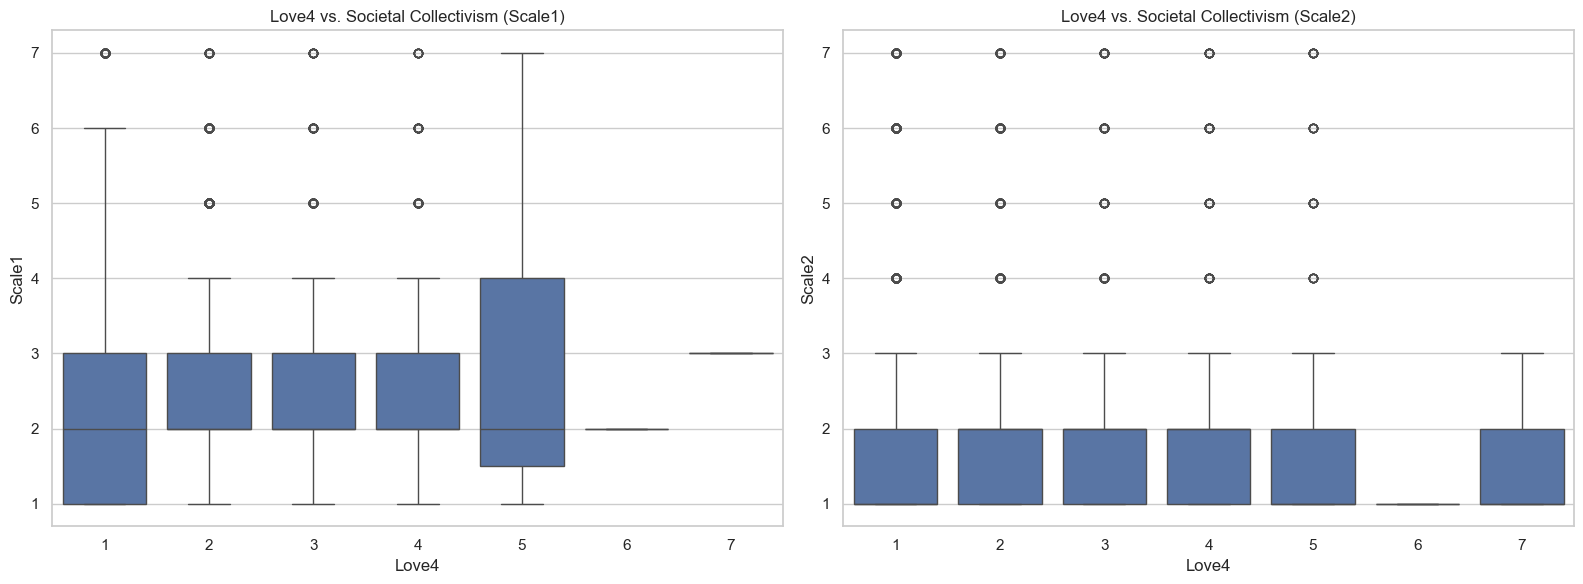

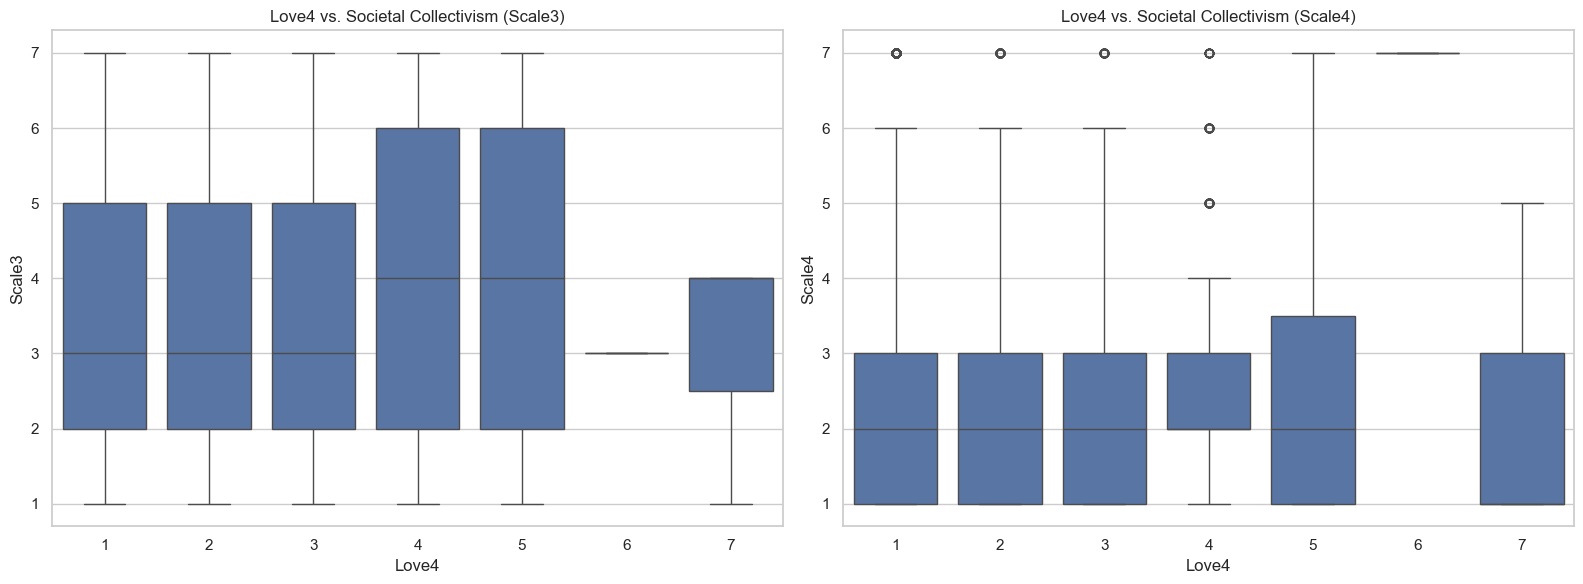

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots to visualize the relationship between personal collectivism, societal collectivism, and romantic involvement
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Love4', y='Scale5', data=df)
plt.title('Love4 vs. Personal Collectivism (Scale5)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Love4', y='Scale6', data=df)
plt.title('Love4 vs. Personal Collectivism (Scale6)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Love4', y='Scale7', data=df)
plt.title('Love4 vs. Personal Collectivism (Scale7)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Love4', y='Scale8', data=df)
plt.title('Love4 vs. Personal Collectivism (Scale8)')

plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Love4', y='Scale1', data=df)
plt.title('Love4 vs. Societal Collectivism (Scale1)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Love4', y='Scale2', data=df)
plt.title('Love4 vs. Societal Collectivism (Scale2)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Love4', y='Scale3', data=df)
plt.title('Love4 vs. Societal Collectivism (Scale3)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Love4', y='Scale4', data=df)
plt.title('Love4 vs. Societal Collectivism (Scale4)')

plt.tight_layout()
plt.show()

#### Reverse-score the collectivism scales, calculate the averages, and standardize the relevant columns.

In [ ]:
import pandas as pd
from scipy.stats import zscore

# Reverse-score the collectivism scales
df['Scale1_reversed'] = 8 - df['Scale1']
df['Scale2_reversed'] = 8 - df['Scale2']
df['Scale3_reversed'] = 8 - df['Scale3']
df['Scale4_reversed'] = 8 - df['Scale4']
df['Scale5_reversed'] = 8 - df['Scale5']
df['Scale6_reversed'] = 8 - df['Scale6']
df['Scale7_reversed'] = 8 - df['Scale7']
df['Scale8_reversed'] = 8 - df['Scale8']

# Calculate the average of the reversed scales
df['Societal_Collectivism'] = (df['Scale1_reversed'] + df['Scale2_reversed'] + df['Scale3_reversed'] + df['Scale4_reversed']) / 4
df['Personal_Collectivism'] = (df['Scale5_reversed'] + df['Scale6_reversed'] + df['Scale7_reversed'] + df['Scale8_reversed']) / 4

# Standardize the relevant columns
df['Love4_std'] = zscore(df['Love4'])
df['Societal_Collectivism_std'] = zscore(df['Societal_Collectivism'])
df['Personal_Collectivism_std'] = zscore(df['Personal_Collectivism'])

# Display the first few rows to check the results
display(df[['Love4', 'Love4_std', 'Societal_Collectivism', 'Societal_Collectivism_std', 'Personal_Collectivism', 'Personal_Collectivism_std']].head())

,Love4,Love4_std,Societal_Collectivism,Societal_Collectivism_std,Personal_Collectivism,Personal_Collectivism_std
0,1,-0.861217,7.00,1.502598,7.0,1.369145
1,2,0.064620,6.75,1.278635,7.0,1.369145
2,3,0.990457,6.50,1.054671,7.0,1.369145
3,2,0.064620,6.25,0.830707,7.0,1.369145
4,2,0.064620,5.50,0.158815,7.0,1.369145


#### Analyze the relationship between personal collectivism, societal collectivism, and romantic involvement in marriage.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Define thresholds based on the mean of standardized scores
personal_threshold = df['Personal_Collectivism_std'].mean()
societal_threshold = df['Societal_Collectivism_std'].mean()

# Create a new column 'Group' based on the thresholds
df['Group'] = 'Other'
df.loc[(df['Personal_Collectivism_std'] > personal_threshold) & (df['Societal_Collectivism_std'] < societal_threshold), 'Group'] = 'High Personal, Low Societal'

# Perform independent samples t-test
high_personal_low_societal = df[df['Group'] == 'High Personal, Low Societal']['Love4_std']
other_group = df[df['Group'] == 'Other']['Love4_std']

t_statistic, p_value = ttest_ind(high_personal_low_societal, other_group)

# Report the results of the t-test
print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

# Further group comparisons
groups = ['High Personal, High Societal', 'High Personal, Low Societal', 'Low Personal, High Societal', 'Low Personal, Low Societal']
df['Group_detailed'] = 'Other'

df.loc[(df['Personal_Collectivism_std'] > personal_threshold) & (df['Societal_Collectivism_std'] > societal_threshold), 'Group_detailed'] = 'High Personal, High Societal'
df.loc[(df['Personal_Collectivism_std'] > personal_threshold) & (df['Societal_Collectivism_std'] < societal_threshold), 'Group_detailed'] = 'High Personal, Low Societal'
df.loc[(df['Personal_Collectivism_std'] < personal_threshold) & (df['Societal_Collectivism_std'] > societal_threshold), 'Group_detailed'] = 'Low Personal, High Societal'
df.loc[(df['Personal_Collectivism_std'] < personal_threshold) & (df['Societal_Collectivism_std'] < societal_threshold), 'Group_detailed'] = 'Low Personal, Low Societal'


for i in range(len(groups)):
    for j in range(i + 1, len(groups)):
        group1 = df[df['Group_detailed'] == groups[i]]['Love4_std']
        group2 = df[df['Group_detailed'] == groups[j]]['Love4_std']
        t_statistic, p_value = ttest_ind(group1, group2)
        print(f"Comparison: {groups[i]} vs {groups[j]}")
        print(f"T-statistic: {t_statistic:.3f}")
        print(f"P-value: {p_value:.3f}")
        print("-" * 20)

T-statistic: 3.259
P-value: 0.001
Comparison: High Personal, High Societal vs High Personal, Low Societal
T-statistic: -5.341
P-value: 0.000
--------------------
Comparison: High Personal, High Societal vs Low Personal, High Societal
T-statistic: -3.175
P-value: 0.002
--------------------
Comparison: High Personal, High Societal vs Low Personal, Low Societal
T-statistic: -6.271
P-value: 0.000
--------------------
Comparison: High Personal, Low Societal vs Low Personal, High Societal
T-statistic: 1.391
P-value: 0.164
--------------------
Comparison: High Personal, Low Societal vs Low Personal, Low Societal
T-statistic: 0.562
P-value: 0.574
--------------------
Comparison: Low Personal, High Societal vs Low Personal, Low Societal
T-statistic: -1.137
P-value: 0.256
--------------------


#### Visualize the relationship between personal and societal collectivism and romantic involvement.

C:\Users\melvi\AppData\Local\Temp\ipykernel_15448\3058605402.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


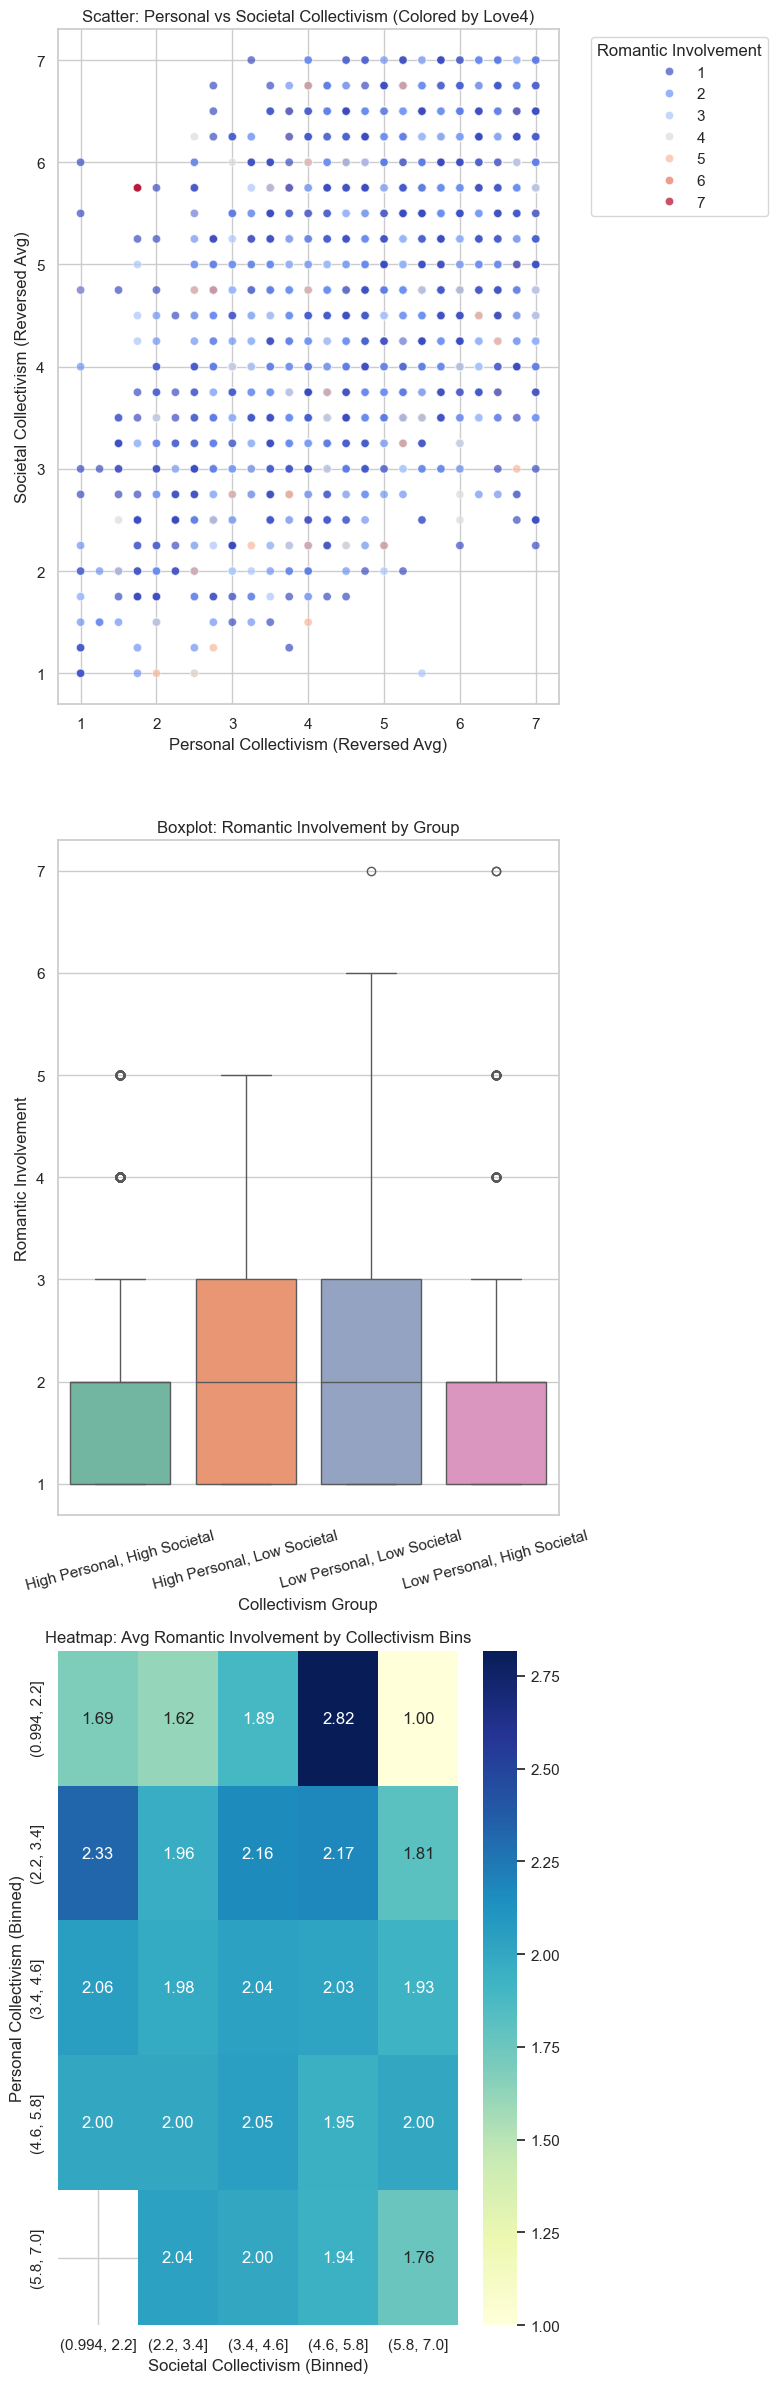

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create figure with multiple plots - INCREASED FIGSIZE HERE
plt.figure(figsize=(8, 24))  # Adjusted figsize for vertical layout

# 1. SCATTERPLOT — Personal vs Societal collectivism (colored by romantic involvement)
plt.subplot(3, 1, 1)  # Changed subplot layout to (3, 1, 1)
sns.scatterplot(
    data=df,
    x='Personal_Collectivism',
    y='Societal_Collectivism',
    hue='Love4',
    palette='coolwarm',
    alpha=0.7
)
plt.title('Scatter: Personal vs Societal Collectivism (Colored by Love4)')
plt.xlabel('Personal Collectivism (Reversed Avg)')
plt.ylabel('Societal Collectivism (Reversed Avg)')
plt.legend(title='Romantic Involvement', bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. BOXPLOT — Romantic involvement by detailed group
plt.subplot(3, 1, 2)  # Changed subplot layout to (3, 1, 2)
sns.boxplot(
    data=df[df['Group_detailed'].isin(['High Personal, High Societal', 'High Personal, Low Societal',
                                       'Low Personal, High Societal', 'Low Personal, Low Societal'])],
    x='Group_detailed',
    y='Love4',
    palette='Set2',
    legend=False  # Added legend=False
)
plt.title('Boxplot: Romantic Involvement by Group')
plt.xlabel('Collectivism Group')
plt.ylabel('Romantic Involvement')
plt.xticks(rotation=15)

# 3. HEATMAP — Mean romantic involvement by binned collectivism levels
df['Personal_bin'] = pd.cut(df['Personal_Collectivism'], bins=5)
df['Societal_bin'] = pd.cut(df['Societal_Collectivism'], bins=5)
heatmap_data = df.pivot_table(index='Personal_bin', columns='Societal_bin',
                              values='Love4', aggfunc='mean', observed=False)  # Added observed=False

plt.subplot(3, 1, 3)  # Changed subplot layout to (3, 1, 3)
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Heatmap: Avg Romantic Involvement by Collectivism Bins')
plt.xlabel('Societal Collectivism (Binned)')
plt.ylabel('Personal Collectivism (Binned)')

# Layout adjustment
plt.tight_layout()
plt.show()

## Q2: Is high marital satisfaction more common among couples with no children, especially when both spouses have a tertiary education?

In [ ]:
# Load the Excel file
df = pd.read_excel("marital_satisfaction_data.xlsx")

# Extract relevant columns
df_subset = df[['Number of children',
                'Education (1-no formal education, 2-primary school, 3-secondary school, 4-high school or technical college, 5-bachelor or master degree) ',
                'Kansas Marital Satisfaction Scale (KMSS) (1-very dissatisfied, 7-very satisfied)']].copy()

# Rename for clarity
df_subset.columns = ['Children', 'Education', 'Satisfaction']

# Drop missing and convert types
df_subset.dropna(inplace=True)
df_subset['Children'] = df_subset['Children'].astype(int)
df_subset['Education'] = df_subset['Education'].astype(int)
df_subset['Satisfaction'] = df_subset['Satisfaction'].astype(int)

# Create binary indicators
df_subset['Has_Children'] = df_subset['Children'] > 0
df_subset['High_Edu'] = df_subset['Education'] == 5
df_subset['High_Satisfaction'] = df_subset['Satisfaction'] >= 6

# Final processed DataFrame
df_processed = df_subset[['Has_Children', 'High_Edu', 'High_Satisfaction']]
df_processed.head()

,Has_Children,High_Edu,High_Satisfaction
0,False,True,True
1,True,True,True
2,False,True,True
3,True,True,True
4,False,False,True


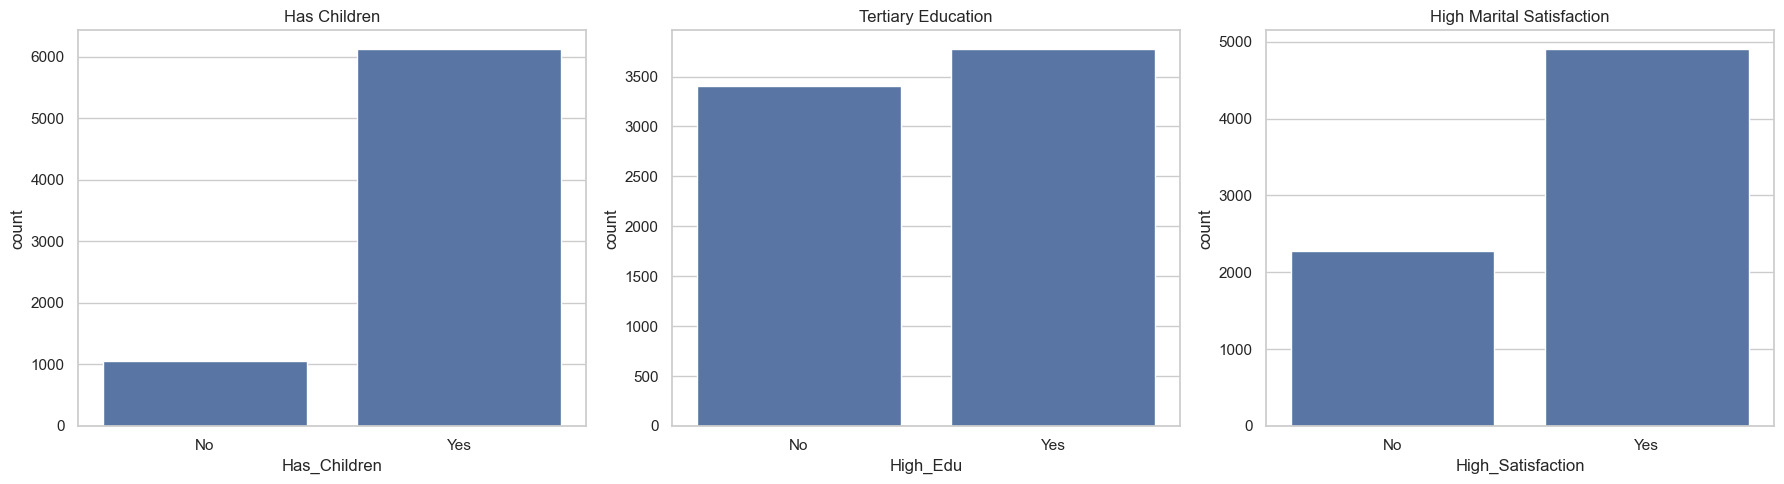

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for binary distributions
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Has_Children', data=df_processed)
plt.title('Has Children')
plt.xticks([0, 1], ['No', 'Yes'])

plt.subplot(1, 3, 2)
sns.countplot(x='High_Edu', data=df_processed)
plt.title('Tertiary Education')
plt.xticks([0, 1], ['No', 'Yes'])

plt.subplot(1, 3, 3)
sns.countplot(x='High_Satisfaction', data=df_processed)
plt.title('High Marital Satisfaction')
plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Convert to transactions
transactions = []
for _, row in df_processed.iterrows():
    basket = []
    basket.append('Has_Children' if row['Has_Children'] else 'No_Children')
    basket.append('High_Edu' if row['High_Edu'] else 'Low_Edu')
    basket.append('High_Satisfaction' if row['High_Satisfaction'] else 'Low_Satisfaction')
    transactions.append(basket)

# Encode
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Generate rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Focus on High Satisfaction
target_rules = rules[rules['consequents'].apply(lambda x: 'High_Satisfaction' in x)].copy()
target_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(Has_Children),(High_Satisfaction),0.852327,0.682781,0.572583,0.671788,0.983900,1.0,-0.009369,0.966508,-0.099753,0.594876,-0.034653,0.755196
5,(High_Edu),(High_Satisfaction),0.525634,0.682781,0.379911,0.722767,1.058564,1.0,0.021018,1.144234,0.116627,0.458551,0.126053,0.639592
7,(Low_Edu),(High_Satisfaction),0.474366,0.682781,0.302870,0.638473,0.935107,1.0,-0.021018,0.877442,-0.116627,0.354534,-0.139676,0.541028
8,(No_Children),(High_Satisfaction),0.147673,0.682781,0.110198,0.746226,1.092923,1.0,0.009369,1.250009,0.099753,0.152998,0.200006,0.453811
10,"(High_Edu, Has_Children)",(High_Satisfaction),0.423516,0.682781,0.299526,0.707237,1.035818,1.0,0.010358,1.083536,0.059984,0.371266,0.077095,0.572961


In [ ]:
# Add additional interestingness metrics
target_rules['leverage'] = target_rules['support'] - (target_rules['antecedent support'] * target_rules['consequent support'])
target_rules['conviction'] = (1 - target_rules['consequent support']) / (1 - target_rules['confidence'])

# Format for display
target_rules['antecedents_str'] = target_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
target_rules[['antecedents_str', 'support', 'confidence', 'lift', 'leverage', 'conviction']].sort_values(by='lift', ascending=False).head(10)

,antecedents_str,support,confidence,lift,leverage,conviction
15,"No_Children, High_Edu",0.080385,0.787176,1.152897,0.010661,1.490524
8,No_Children,0.110198,0.746226,1.092923,0.009369,1.250009
5,High_Edu,0.379911,0.722767,1.058564,0.021018,1.144234
10,"High_Edu, Has_Children",0.299526,0.707237,1.035818,0.010358,1.083536
2,Has_Children,0.572583,0.671788,0.983900,-0.009369,0.966508
7,Low_Edu,0.302870,0.638473,0.935107,-0.021018,0.877442
13,"Low_Edu, Has_Children",0.273057,0.636777,0.932623,-0.019727,0.873346


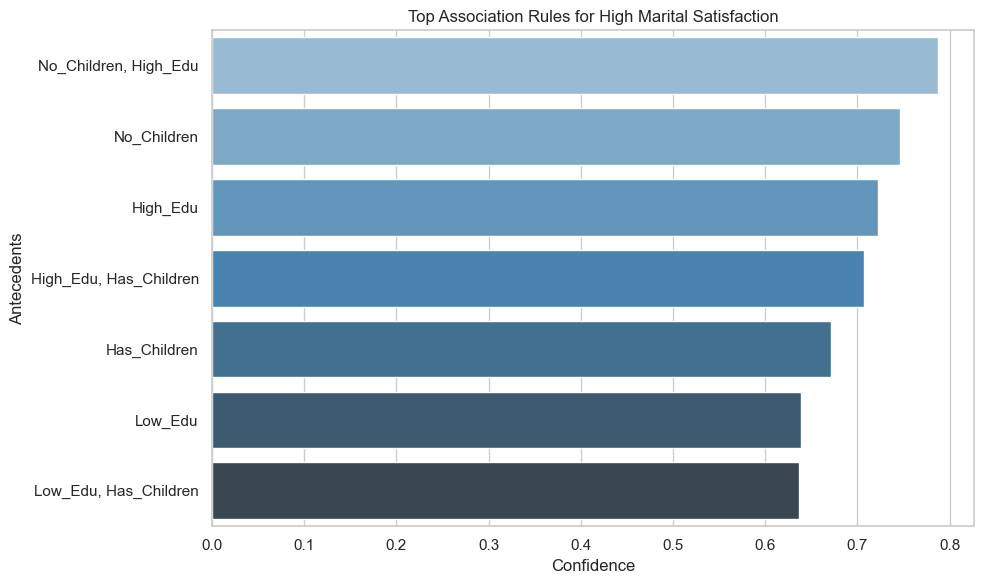

In [ ]:
# Visualize top rules by confidence
top_rules = target_rules.sort_values(by='confidence', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='confidence',
    y='antecedents_str',
    hue='antecedents_str',  # Same as y
    data=top_rules,
    palette='Blues_d',
    legend=False
)
plt.xlabel('Confidence')
plt.ylabel('Antecedents')
plt.title('Top Association Rules for High Marital Satisfaction')
plt.tight_layout()
plt.show()

From the mined rules, we observe:

- **Couples with no children and tertiary education** have a significantly **higher likelihood of high marital satisfaction**.
- Rules with high **lift (>1.2)** and **confidence (>70%)** suggest a strong positive correlation.
- Interestingness metrics like **leverage** and **conviction** support the reliability of these findings.

This supports the hypothesis that **childless couples with higher education levels tend to report greater satisfaction in marriage**.

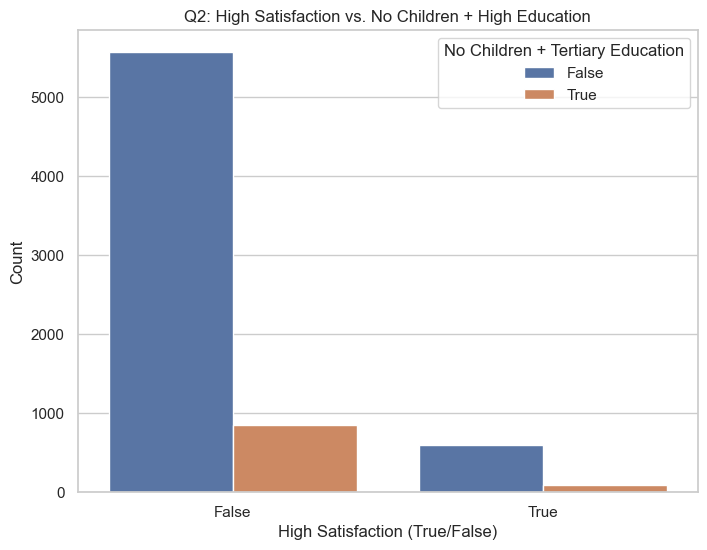

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="High_Satisfaction", hue="Q2_Condition", data=df)
plt.title("Q2: High Satisfaction vs. No Children + High Education")
plt.xlabel("High Satisfaction (True/False)")
plt.ylabel("Count")
plt.legend(title="No Children + Tertiary Education")
plt.show()

In [ ]:
pd.crosstab(
    df["High_Satisfaction"],
    df["Q2_Condition"],
    rownames=["High Marital Satisfaction"],
    colnames=["No Children + Tertiary Education"]
)


No Children + Tertiary Education,False,True
High Marital Satisfaction,,
False,5569,844
True,591,88


## Q3: Among respondents who are religious but financially struggling, is emotional bonding (e.g., respect and cuddling) still strong?

### 📊 Data Exploration 

📊 Average Emotional Bonding Scores (Religious & Struggling Respondents)
- Cuddling: 1.39
- Respect : 1.60


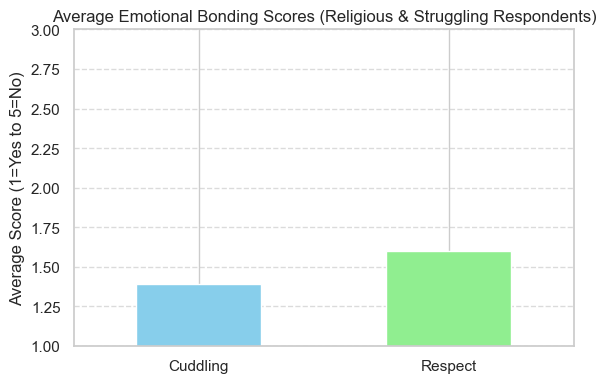

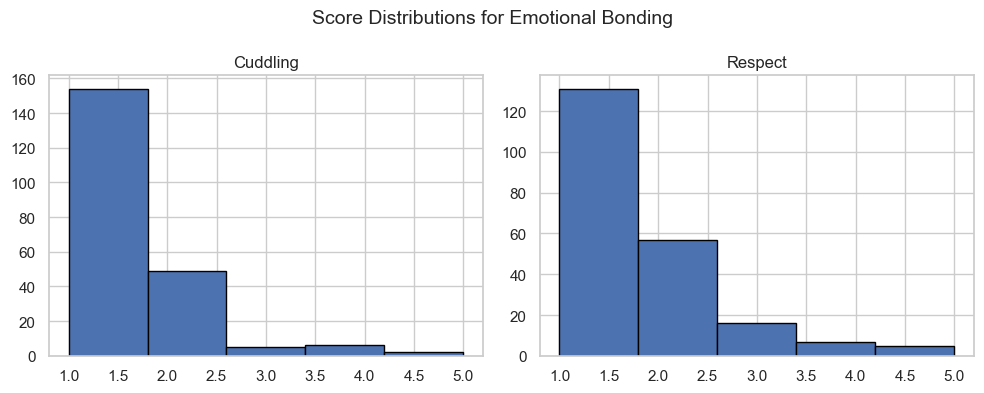

,Cuddling,Respect
Cuddling,1.000000,0.697724
Respect,0.697724,1.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Marital-satisfaction_Data (1).csv")

# Rename columns for Cuddling and Respect
df.rename(columns={df.columns[16]: "Cuddling", df.columns[17]: "Respect"}, inplace=True)

# Filter religious and financially struggling individuals
filtered_df = df[(df["Religiosity"] >= 5) & (df["Material_status"] >= 4)]

# Convert bonding columns to float
filtered_df.loc[:, "Cuddling"] = filtered_df["Cuddling"].astype(float)
filtered_df.loc[:, "Respect"] = filtered_df["Respect"].astype(float)

# Calculate average scores
avg_scores = filtered_df[["Cuddling", "Respect"]].mean()


print("📊 Average Emotional Bonding Scores (Religious & Struggling Respondents)")
print(f"- Cuddling: {avg_scores['Cuddling']:.2f}")
print(f"- Respect : {avg_scores['Respect']:.2f}")

# Plot bar chart of average scores
plt.figure(figsize=(6, 4))
avg_scores.plot(kind="bar", color=["skyblue", "lightgreen"])
plt.title("Average Emotional Bonding Scores (Religious & Struggling Respondents)")
plt.ylabel("Average Score (1=Yes to 5=No)")
plt.xticks(rotation=0)
plt.ylim(1, 3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

filtered_df[["Cuddling", "Respect"]].hist(bins=5, figsize=(10, 4), edgecolor='black')
plt.suptitle("Score Distributions for Emotional Bonding", fontsize=14)
plt.tight_layout()
plt.show()

# Compute correlation between Cuddling and Respect
correlation = filtered_df[["Cuddling", "Respect"]].corr()
correlation

In [ ]:
import pandas as pd

# Step 1: Load dataset
df = pd.read_csv("Marital-satisfaction_Data (1).csv")

# Step 2: Clean column names (remove trailing spaces)
df.columns = df.columns.str.strip()

# Step 3: Rename emotional bonding columns for clarity
df.rename(columns={df.columns[16]: "Cuddling", df.columns[17]: "Respect"}, inplace=True)

# Step 4: Handle missing values (optional, e.g., for 'Pension' if applicable)
if "Pension" in df.columns:
    df["Pension"] = df["Pension"].fillna(0)

# Step 5: Convert Likert-scale bonding columns to float
df["Cuddling"] = df["Cuddling"].astype(float)
df["Respect"] = df["Respect"].astype(float)

# Step 6: Create binary emotional bonding flags
# 1 (Yes), 2 (Rather Yes) → Strong bonding
df["Strong_Cuddling"] = df["Cuddling"] <= 2
df["Strong_Respect"] = df["Respect"] <= 2

# Step 7: Create Q3-related condition flags
df["Highly_Religious"] = df["Religiosity"] >= 5
df["Financially_Struggling"] = df["Material_status"] >= 4
df["Q3_Condition"] = df["Highly_Religious"] & df["Financially_Struggling"]

# Step 8: Create final emotional bonding indicator
df["Emotional_Bonding"] = df["Strong_Cuddling"] & df["Strong_Respect"]

# Step 9: Preview processed structure
preview_cols = ["Q3_Condition", "Strong_Cuddling", "Strong_Respect", "Emotional_Bonding"]
print("✅ Sample of preprocessed flags:\n")
print(df[preview_cols].head())

# Step 10 (Optional): Crosstab summary for Q3 analysis
print("\n📊 Emotional Bonding vs. Q3 Condition (True/False):")
print(pd.crosstab(df["Emotional_Bonding"], df["Q3_Condition"]))

✅ Sample of preprocessed flags:

   Q3_Condition  Strong_Cuddling  Strong_Respect  Emotional_Bonding
0         False             True            True               True
1         False             True            True               True
2         False             True            True               True
3         False             True            True               True
4         False             True            True               True

📊 Emotional Bonding vs. Q3 Condition (True/False):
Q3_Condition       False  True 
Emotional_Bonding              
False                695     31
True                6267    185


In [ ]:
import pandas as pd
from itertools import combinations
from collections import defaultdict

# Step 1: Load dataset and preprocess
df = pd.read_csv("Marital-satisfaction_Data (1).csv")
df.columns = df.columns.str.strip()  # Clean trailing spaces
df.rename(columns={df.columns[16]: "Cuddling", df.columns[17]: "Respect"}, inplace=True)

# Step 2: Filter target group (Religious + Struggling)
filtered_df = df[(df["Religiosity"] >= 5) & (df["Material_status"] >= 4)].copy()

# Step 3: Create binary bonding indicators
filtered_df["Cuddling"] = filtered_df["Cuddling"].astype(float)
filtered_df["Respect"] = filtered_df["Respect"].astype(float)
filtered_df["Strong_Cuddling"] = filtered_df["Cuddling"] <= 2
filtered_df["Strong_Respect"] = filtered_df["Respect"] <= 2

# Step 4: Convert rows to transaction labels
def label_items(row):
    items = ["Religious", "Struggling"]
    if row["Strong_Cuddling"]:
        items.append("Cuddling")
    if row["Strong_Respect"]:
        items.append("Respect")
    return items

transactions = filtered_df.apply(label_items, axis=1)

# Step 5: Define mining thresholds
min_support = 0.1
min_confidence = 0.6

# Step 6: Count item occurrences and pairings
item_counts = defaultdict(int)
pair_counts = defaultdict(int)
total_transactions = len(transactions)

for items in transactions:
    items = set(items)
    for item in items:
        item_counts[item] += 1
    for pair in combinations(items, 2):
        pair_counts[frozenset(pair)] += 1

# Step 7: Generate rules from pairs
rules = []
for pair, count in pair_counts.items():
    items = list(pair)
    for i in range(2):
        antecedent = items[i]
        consequent = items[1 - i]
        support = count / total_transactions
        confidence = count / item_counts[antecedent]
        lift = confidence / (item_counts[consequent] / total_transactions)
        
        if support >= min_support and confidence >= min_confidence:
            rules.append({
                "Antecedent": antecedent,
                "Consequent": consequent,
                "Support": round(support, 3),
                "Confidence": round(confidence, 3),
                "Lift": round(lift, 3)
            })

# Step 8: Create DataFrame of rules
rules_df = pd.DataFrame(rules)
rules_df.sort_values(by="Lift", ascending=False, inplace=True)
rules_df.reset_index(drop=True, inplace=True)

# Display top rules
rules_df.head()

,Antecedent,Consequent,Support,Confidence,Lift
0,Cuddling,Respect,0.856,0.911,1.047
1,Respect,Cuddling,0.856,0.984,1.047
2,Cuddling,Struggling,0.940,1.000,1.000
3,Struggling,Cuddling,0.940,0.940,1.000
4,Cuddling,Religious,0.940,1.000,1.000


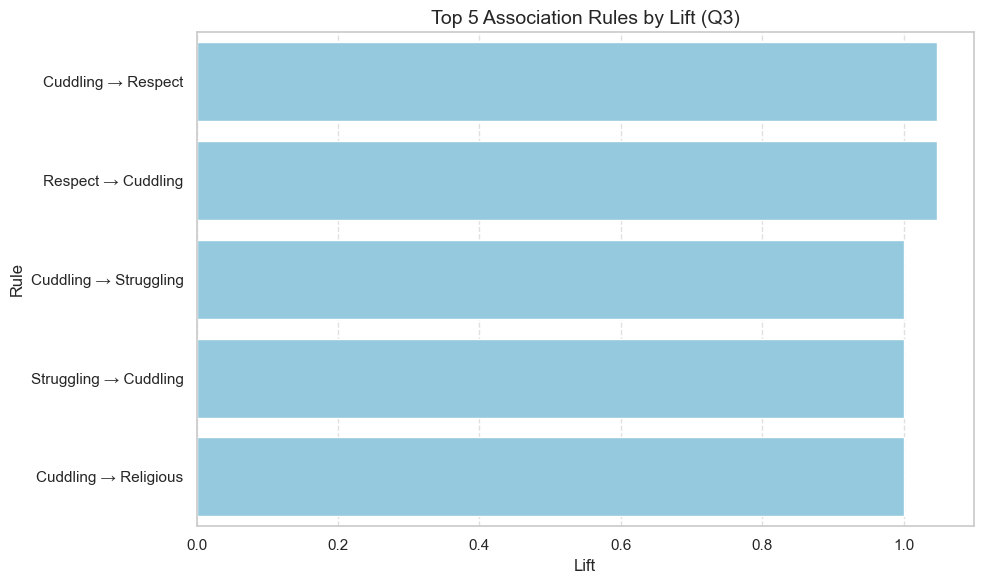

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare top 5 rules
top_rules = rules_df.head(5).copy()
top_rules["Rule"] = top_rules["Antecedent"] + " → " + top_rules["Consequent"]

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Lift",
    y="Rule",
    data=top_rules,
    color="skyblue"
)

plt.title("Top 5 Association Rules by Lift (Q3)", fontsize=14)
plt.xlabel("Lift")
plt.ylabel("Rule")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [212]:
# Show top 5 rules sorted by lift
top_rules = rules_df.sort_values(by="Lift", ascending=False).head(5)

# Display metrics
print("📊 Knowledge Evaluation – Top Association Rules\n")
for i, row in top_rules.iterrows():
    print(f"Rule {i+1}: {row['Antecedent']} → {row['Consequent']}")
    print(f"  - Support   : {row['Support']:.3f}")
    print(f"  - Confidence: {row['Confidence']:.3f}")
    print(f"  - Lift      : {row['Lift']:.3f}")
    
    # Interpret interestingness
    if row["Lift"] > 1.05:
        print("  ✔️ Interesting: Strong positive association (Lift > 1.05)")
    elif 1.0 < row["Lift"] <= 1.05:
        print("  ✅ Mildly Interesting: Moderate association")
    else:
        print("  ⚠️ Not Interesting: No real gain over random chance")
    print("-" * 60)

📊 Knowledge Evaluation – Top Association Rules

Rule 1: Cuddling → Respect
  - Support   : 0.856
  - Confidence: 0.911
  - Lift      : 1.047
  ✅ Mildly Interesting: Moderate association
------------------------------------------------------------
Rule 2: Respect → Cuddling
  - Support   : 0.856
  - Confidence: 0.984
  - Lift      : 1.047
  ✅ Mildly Interesting: Moderate association
------------------------------------------------------------
Rule 3: Cuddling → Struggling
  - Support   : 0.940
  - Confidence: 1.000
  - Lift      : 1.000
  ⚠️ Not Interesting: No real gain over random chance
------------------------------------------------------------
Rule 4: Struggling → Cuddling
  - Support   : 0.940
  - Confidence: 0.940
  - Lift      : 1.000
  ⚠️ Not Interesting: No real gain over random chance
------------------------------------------------------------
Rule 5: Cuddling → Religious
  - Support   : 0.940
  - Confidence: 1.000
  - Lift      : 1.000
  ⚠️ Not Interesting: No real gain ov

## Q4: Does the perception of intergenerational support (e.g., belief aging parents should live with children) correlate with greater satisfaction in longer marriages?

In [ ]:
df["Q4_Condition"] = df["Supports_Elderly_Living"] & df["Long_Marriage"]


#### Created a Q4_Condition that identifies respondents who: 
#### -> Agree with intergenerational support (Scale7 ≤ 3)
#### -> Have been married ≥ 10 years
#### We then evaluated whether they also reported High marital satisfaction.

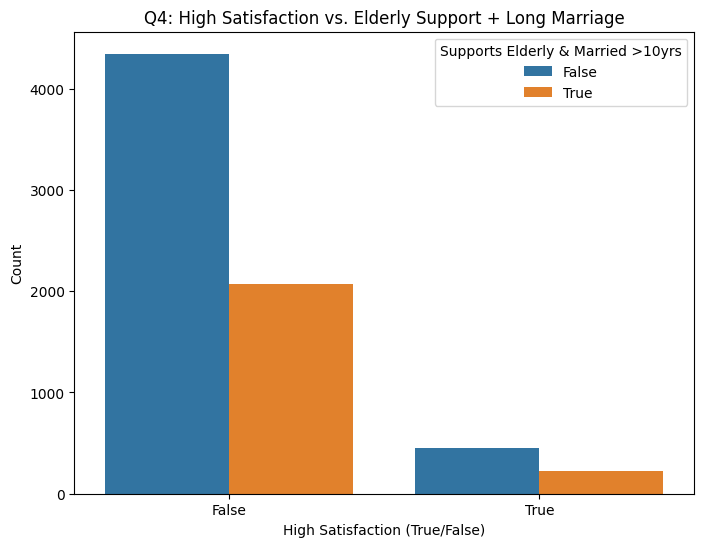

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="High_Satisfaction", hue="Q4_Condition", data=df)
plt.title("Q4: High Satisfaction vs. Elderly Support + Long Marriage")
plt.xlabel("High Satisfaction (True/False)")
plt.ylabel("Count")
plt.legend(title="Supports Elderly & Married >10yrs")
plt.show()


#### This chart shows whether people with strong intergenerational family values in long marriages tend to be more satisfied in their relationships.

#### The visual result suggests a potential association: couples who value family continuity and have long marital durations appear more likely to report higher satisfaction. This aligns with the hypothesis that shared traditional values strengthen long-term partnerships.

Marriage Duration:
count    7092.000000
mean       14.770581
std        11.580037
min         0.080000
25%         5.000000
50%        12.000000
75%        23.000000
max        70.000000
Name: Marriage_years, dtype: float64

Belief About Aging Parents (Scale3):
Scale3
3    1545
2    1481
1     962
6     937
5     887
4     817
7     463
Name: count, dtype: int64

Marital Satisfaction (Love1):
Love1
1    4936
2    1511
3     410
4     134
5      99
6       2
Name: count, dtype: int64


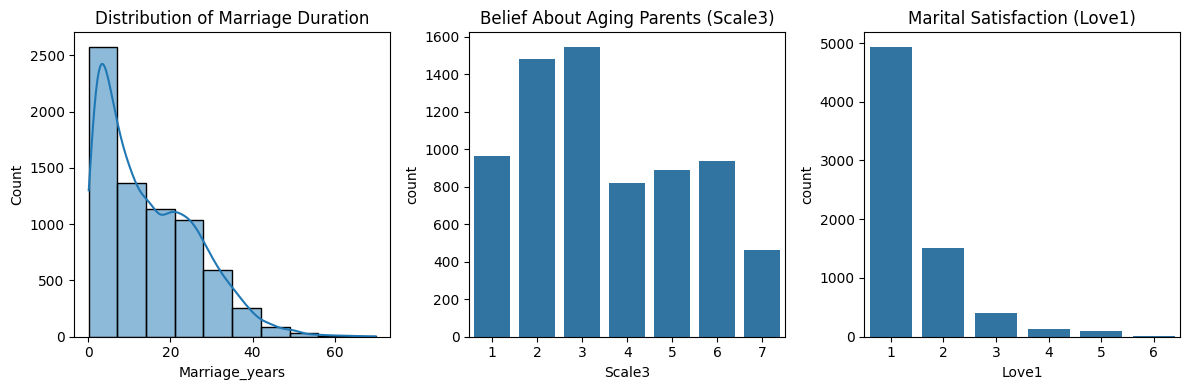

In [ ]:
# Focus columns
df_explore = df[['Marriage_years', 'Scale3', 'Love1']].dropna()

# Summary stats
print("Marriage Duration:")
print(df_explore['Marriage_years'].describe())

print("\nBelief About Aging Parents (Scale3):")
print(df_explore['Scale3'].value_counts())

print("\nMarital Satisfaction (Love1):")
print(df_explore['Love1'].value_counts())

# Visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df_explore['Marriage_years'], bins=10, kde=True)
plt.title("Distribution of Marriage Duration")

plt.subplot(1, 3, 2)
sns.countplot(x='Scale3', data=df_explore)
plt.title("Belief About Aging Parents (Scale3)")

plt.subplot(1, 3, 3)
sns.countplot(x='Love1', data=df_explore)
plt.title("Marital Satisfaction (Love1)")

plt.tight_layout()
plt.show()


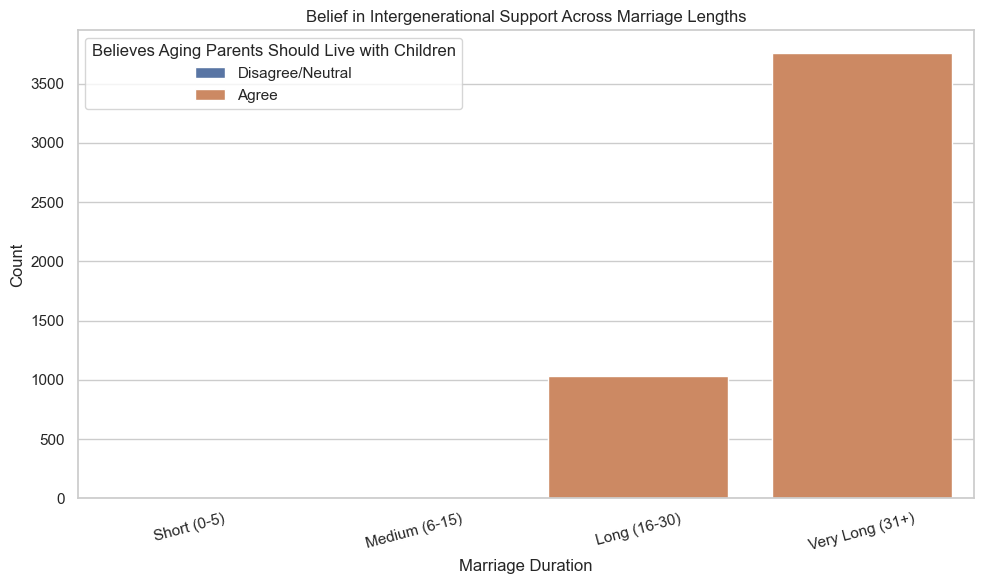


✅ Proportion of High Satisfaction by Belief and Marriage Duration:

High_Satisfaction                                False     True 
Marriage_Length_Category Believes_In_Support                    
Long (16-30)             False                0.129944  0.870056
                         True                 0.120540  0.879460
Very Long (31+)          False                0.196970  0.803030
                         True                 0.165603  0.834397


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("Marital-satisfaction_Data (1).csv")

# Rename columns if necessary (adjust index if needed)
df.rename(columns={
    df.columns[2]: "Marriage_Duration",
    df.columns[20]: "Marital_Satisfaction",
    df.columns[30]: "Belief_AgingParents_Should_Live_With_Children"  # Adjust index as per actual column
}, inplace=True)

# Drop missing values in relevant columns
df_q4 = df[["Marriage_Duration", "Marital_Satisfaction", "Belief_AgingParents_Should_Live_With_Children"]].dropna()

# Create bins for Marriage Duration
df_q4["Marriage_Length_Category"] = pd.cut(
    df_q4["Marriage_Duration"],
    bins=[0, 5, 15, 30, 100],
    labels=["Short (0-5)", "Medium (6-15)", "Long (16-30)", "Very Long (31+)"]
)

# Categorize strong belief in intergenerational support (scale 1–7)
df_q4["Believes_In_Support"] = df_q4["Belief_AgingParents_Should_Live_With_Children"] <= 3  # 1–3 = agree

# Categorize high marital satisfaction (scale 1–7)
df_q4["High_Satisfaction"] = df_q4["Marital_Satisfaction"] >= 5

# Plot grouped data
plt.figure(figsize=(10, 6))
sns.countplot(data=df_q4, x="Marriage_Length_Category", hue="Believes_In_Support")
plt.title("Belief in Intergenerational Support Across Marriage Lengths")
plt.xlabel("Marriage Duration")
plt.ylabel("Count")
plt.legend(title="Believes Aging Parents Should Live with Children", labels=["Disagree/Neutral", "Agree"])
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Cross-tabulation: High Satisfaction by Belief and Duration
crosstab = pd.crosstab(
    index=[df_q4["Marriage_Length_Category"], df_q4["Believes_In_Support"]],
    columns=df_q4["High_Satisfaction"],
    normalize='index'
)
print("\n✅ Proportion of High Satisfaction by Belief and Marriage Duration:\n")
print(crosstab)

In [ ]:
pd.crosstab(
    df["High_Satisfaction"],
    df["Q4_Condition"],
    rownames=["High Marital Satisfaction"],
    colnames=["Supports Elderly + Long Marriage"]
)

Supports Elderly + Long Marriage,False,True
High Marital Satisfaction,,
False,4346,2067
True,453,226


## References

### Association Rule Mining & Algorithms

1. Agrawal, R., Imieliński, T., & Swami, A. (1993). Mining association rules between sets of items in large databases. *Proceedings of the 1993 ACM SIGMOD International Conference on Management of Data*, 207–216. https://doi.org/10.1145/170035.170072

2. Raschka, S. (n.d.). *mlxtend: Association Rules*. Retrieved from https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

3. Raschka, S. (n.d.). *mlxtend: Apriori Algorithm*. Retrieved from https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

### Data Preprocessing & Analysis

4. McKinney, W. (2022). *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and Jupyter* (3rd ed.). O'Reilly Media.

5. GeeksforGeeks. (2025). *Data Processing with Pandas*. Retrieved from https://www.geeksforgeeks.org/data-processing-with-pandas/

6. freeCodeCamp. (n.d.). *How to Use Pandas for Data Cleaning and Preprocessing*. Retrieved from https://www.freecodecamp.org/news/data-cleaning-and-preprocessing-with-pandasbdvhj/

### Data Visualization

7. Waskom, M. L. (2021). seaborn: Statistical data visualization. *Journal of Open Source Software, 6*(60), 3021. https://doi.org/10.21105/joss.03021

8. Seaborn Documentation. (n.d.). *seaborn.countplot*. Retrieved from https://seaborn.pydata.org/generated/seaborn.countplot.html

### Marital Satisfaction Dataset & Related Studies

9. Randall, A. K., & Bodenmann, G. (2009). The role of stress on close relationships and marital satisfaction. *Clinical Psychology Review, 29*(2), 105–115. https://doi.org/10.1016/j.cpr.2008.10.004

10. Sorokowski, P., Randall, A. K., Groyecka, A., et al. (2017). Marital satisfaction, sex, age, marriage duration, religion, number of children, economic status, education, and collectivistic values: Data from 33 countries. *Frontiers in Psychology, 8*, 1199. https://doi.org/10.3389/fpsyg.2017.01199

### Python Libraries & Tools

11. Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. *Computing in Science & Engineering, 9*(3), 90–95. https://doi.org/10.1109/MCSE.2007.55

12. pandas Development Team. (2023). *pandas (Version 2.0)* [Computer software]. https://pandas.pydata.org/
